## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#join on 'Mouse ID'
data = study_results.merge(mouse_metadata,on='Mouse ID',how='left')
# Display the data table for preview
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
len(data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data[data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates
#the line below is for confirming that duplicates are actually duplicates. Commented out
#print(data.loc[data['Mouse ID'] == 'g989', ['Timepoint']])


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#this is done above


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data.drop(data[data['Mouse ID']== 'g989'].index, inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#commented out the line below to move it to the section below
#summary = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
mean = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().reset_index()
mean.rename(columns={'Tumor Volume (mm3)':'mean'},inplace=True)
median = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().reset_index()
median.rename(columns={'Tumor Volume (mm3)':'median'},inplace=True)
variance = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().reset_index()
variance.rename(columns={'Tumor Volume (mm3)':'var'},inplace=True)
std_dev = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().reset_index()
std_dev.rename(columns={'Tumor Volume (mm3)':'std'},inplace=True)
sem = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().reset_index()
sem.rename(columns={'Tumor Volume (mm3)':'sem'},inplace=True)
summary = mean.merge(median,on='Drug Regimen')
summary = summary.merge(variance,on='Drug Regimen')
summary = summary.merge(std_dev,on='Drug Regimen')
summary = summary.merge(sem,on='Drug Regimen')
summary

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



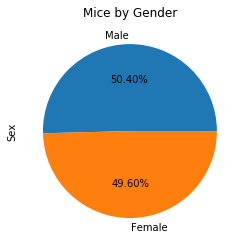

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = data[['Mouse ID','Sex']]
gender = gender.drop_duplicates(subset=['Mouse ID'])
gender['Sex'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Mice by Gender')
plt.show()


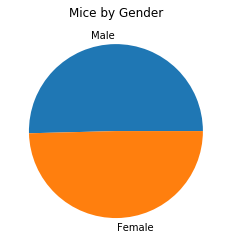

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = data[['Mouse ID','Sex']]
gender = gender.drop_duplicates(subset=['Mouse ID'])
gender['Sex'].value_counts()

plt.title('Mice by Gender')

labels= 'Male','Female'
sizes = [gender['Sex'].groupby(gender['Sex']).count()['Male'],gender['Sex'].groupby(gender['Sex']).count()['Female']]
plt.pie(sizes, labels=labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max = data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max.rename(columns={'Timepoint':'Final Timepoint'},inplace=True)
merged_data = data.merge(max,on='Mouse ID',how='left')
#get the tumor volume at the timepoint for the mouse ID
#data['Final Tumor Volume']= data.loc[data.loc[]]
#data['Tumor Volume (mm3)']
#merged_data['Final Tumor Volume']= merged_data['Final Timepoint']
final_volume = merged_data.loc[merged_data['Timepoint'] == merged_data['Final Timepoint']]
final_volume = final_volume[['Mouse ID','Tumor Volume (mm3)']]
final_volume.rename(columns={'Tumor Volume (mm3)':'Final Tumour Volume'},inplace=True)
merged_data=data.merge(final_volume,on='Mouse ID',how='left')
merged_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumour Volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,f932,0,45.000000,0,Ketapril,Male,15,29,45.000000
2,g107,0,45.000000,0,Ketapril,Female,2,29,71.905117
3,a457,0,45.000000,0,Ketapril,Female,11,30,49.783419
4,c819,0,45.000000,0,Ketapril,Male,21,25,62.175705
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,41.581521
1876,u364,45,31.023923,3,Capomulin,Male,18,17,31.023923
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,61.433892
1878,x773,45,58.634971,4,Placebo,Female,21,30,58.634971


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
